# Modeling: 

## Lasso Regression (L1 Regularization)

![Modeling](https://user-images.githubusercontent.com/67468718/111879997-1bbd6a80-8966-11eb-92c1-01c38cbdbe4a.JPG)



## Contents<a id='Contents'></a>
 * [1. Introduction](#1_Introduction)
 * [2. Sourcing and Loading](#2_Sourcing_and_Loading)
    * [2.1 Import relevant libraries](#2.1_Import_relevant_libraries)
    * [2.2 Load the data](#2.2_Load_the_data)
 * [3. View and Visualize our dependent variable 'price'](#3._View_and_Visualize_our_dependent_variable_price)
    * [3.1 View the data](#3.1_View_the_data)
    * [3.2 Final Visualization of our dependent Variable 'price'](#3.2_Final_Visualization_of_our_dependent_variable_price)
 * [4. Features Selection: Define/Select Features](#4_Features_Selection:_Define/Select_Features)
 * [5. Train/Test Split](#5_Train/Test_Split)
 * [6. Scaling and Transformation: Standardization](#6_Scaling_and_Transformation:_Standardization)
 * [7. Modeling: Lasso Regression (L2 Regularization)](#7_Lasso_Regression_(L2_Regularization))
    * [7.1 Fitting Lasso Regression](#7.1_Fitting_Lasso_Regression)
    * [7.2 Lasso Regression: Coefficients (Before Regularization)](#7.2_Lasso_Regression:_Coefficients_(Before_Regularization))
    * [7.3 Lasso Regression: Residuals Visualization](#7.3_Lasso_Regression:_Residuals_Visualization)
    * [7.4 Lasso Regression Model Evaluation](#7.4_Lasso_Regression_Model_Evaluation)
    * [7.5 Features Selection](#7.5_Features_Selection)
       * [7.5.1 Dropping 'malls' and 'university_count'](#7.5.1_Dropping_malls_university_count)
       * [7.5.2 Features Selection Summary](#7.5.2_Features_Selection_Summary)    
    * [7.6 Regularization II: Lasso](#7.6_Regularization_II:_Lasso)
       * [7.6.1 Fitting Lasso Regression](#7.6.1_Fitting_Lasso_Regression)
       * [7.6.2  Lasso Regression: Coefficients (After Regularization)](#7.6_Lasso_Regression:_Coefficients_(After_Regularization))
       * [7.6.3  Lasso Regression Model Evaluation](#7.6.3_Lasso_Regression_Model_Evaluation)
 * [8. Lasso Regression Tuning Summary](#8_Lasso_Regression_Tuning_Summary)
 * [9. Lasso Regression Actual vs Prediction Visualization](#9_Lasso_Regression_Actual_vs_Prediction_Visualization)
 * [10. Models next step](#10_Models_next_step)

## 1. Introduction<a id='1_Introduction'></a>

Here comes the really fun step: modeling! For this step, we'll be:
 * Training multiple Regression algorithms.
 * Apply hyperparameters tuning where applicable to ensure every algorithm will result in best prediction possible.
 * Finally, evaluate these Models.

**Regression Models:**
 * Linear Regression (Baseline Model).
 * Ridge Regression (L2 Regularization)
 * Lasso Regression (L1 Regularization)
 * Decision Trees
 * Random Forests
 * GB
 * XGBoost
 * Support Vector Regression
 * Stacking
 * Neural networks.
 
 
 **In This Notebook, We'll be using Lasso Regression (L1 Regularization)**



## 2. Sourcing and Loading<a id='2_Sourcing_and_Loading'></a> 

### 2.1 Import relevant libraries<a id='2.1_Import_relevant_libraries'></a> 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os 

plt.style.use('ggplot')

print('***Libraries are imported***')

***Libraries are imported***


### 2.2 Load the data<a id='2.2_Load_the_data'></a>

In [ ]:
# Check Current Directory:
os.getcwd()

In [5]:
# Changing the directory:
os.chdir(r"path/Feature_Engineering/datasets")

In [ ]:
#Confirm the directory:
os.getcwd()

In [7]:
# List files/folders in the cd:
os.listdir()

['pre_processing_df.csv']

In [8]:
df = pd.read_csv('pre_processing_df.csv')

## 3. View and Visualize our dependent variable 'price'<a id='3._View_and_Visualize_our_dependent_variable_price'></a>

### 3.1 View the data<a id='3.1_View_the_data'></a>

In [9]:
#Let's check the df shape:
structure = df.shape
print("Final DataFrame 'df' has Rows:", structure[0], "and Columns: ", structure[1])

Final DataFrame 'df' has Rows: 7484 and Columns:  23


In [10]:
#Let's check the df shape:
df.head()

,property_type,zipcode,price,beds,baths,sqft,lot_size,days_on_market,price_per_sqft,hoa_month,...,median_income,hotness_score,supply_score,demand_score,university_count,barts,malls,universities,bedBath,AvgRoomSize
0,1,94568,905000,3,4,1994,0,80,454,388.0,...,119637,83.72,94.25,73.19,0,1,0,0,12,284.857
1,2,94566,645000,2,2,1221,1237,143,528,379.0,...,126782,80.07,79.57,80.57,0,0,1,0,4,305.250
2,1,94588,940000,4,2,1928,2660,148,488,470.0,...,134451,85.91,87.06,84.76,0,1,1,0,8,321.333
3,0,94588,1036000,3,2,1355,7708,66,765,33.0,...,134451,85.91,87.06,84.76,0,1,1,0,6,271.000
4,0,94568,1250000,4,4,3083,3058,143,405,232.0,...,119637,83.72,94.25,73.19,0,1,0,0,16,385.375


In [11]:
# Summary Statistics:
df.describe()['price'].round(2)

count       7484.00
mean      887769.19
std       387091.45
min       165000.00
25%       590000.00
50%       808000.00
75%      1150000.00
max      1955000.00
Name: price, dtype: float64

### 3.2 Final Visualization of our dependent Variable 'price'<a id='3.2_Final_Visualization_of_our_dependent_variable_price'></a>

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


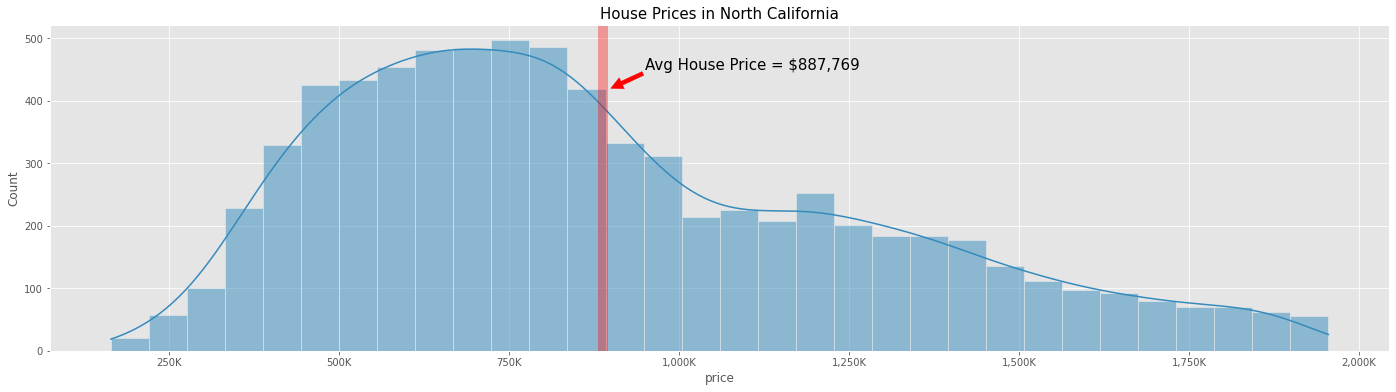

In [12]:
# Making a histogram of the price variable and adding average house sale:
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df['price'], kde=True)
ax.axvline(df['price'].mean(), color='red', ls='-', alpha=0.35, lw=10)
plt.annotate('Avg House Price = $887,769', xy=(900000, 420), xytext=(950000, 450), arrowprops={'color':'red'}, fontsize=15)
ax.set_title('House Prices in North California', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

## 4. Features Selection: Define/Select Features<a id='4_Features_Selection:_Define/Select_Features'></a>


In [13]:
# let's check our final df columns:
df.columns

Index(['property_type', 'zipcode', 'price', 'beds', 'baths', 'sqft',
       'lot_size', 'days_on_market', 'price_per_sqft', 'hoa_month',
       'property_age', 'school_rating', 'school_count', 'median_income',
       'hotness_score', 'supply_score', 'demand_score', 'university_count',
       'barts', 'malls', 'universities', 'bedBath', 'AvgRoomSize'],
      dtype='object')

In [14]:
# Let's define/select our features:
features = ['property_type', 'zipcode', 'beds', 'baths', 'sqft', 'lot_size', 
            'days_on_market', 'price_per_sqft', 'hoa_month', 'property_age', 
            'school_rating', 'school_count', 'median_income', 'hotness_score', 
            'supply_score', 'demand_score', 'university_count', 'barts', 
            'malls', 'universities', 'bedBath', 'AvgRoomSize']

# And, Now let's define X and y:
X = df[features]
y = df.price

## 5. Train/Test Split<a id='5_Train/Test_Split'></a>

Now, let's split our data (X) into training and testing splits, without letting a model learn anything about the test split.

let's have 75/25 Train/Test split

In [15]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

## 6. Scaling and Transformation: Standardization<a id='6_Scaling_and_Transformation:_Standardization'></a>

**Standardization** finds the mean of our data and centers the distribution around it, calculating the number of standard deviations away from the mean each point is. The number of standard deviations are then used as our new values. This centers the data around 0 but technically has no limit to the maximum and minimum values.



In [16]:
# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))


## 7. Modeling: Lasso Regression (L1 Regularization)<a id='7_Lasso_Regression_(L1_Regularization)'></a>

There is another type of regularized regression called lasso regression. In which our loss function is the standard OLS loss function plus the absolute value of each coefficient multiplied by some constant alpha. The method of performing lasso regression in scikit-learn mirrors ridge regression.

### 7.1 Fitting Lasso Regression<a id='7.1_Fitting_Lasso_Regression'></a>


In [17]:
# Import necessary modules
from sklearn.linear_model import Lasso

# Create a ridge regressor: ridge
lasso = Lasso(random_state=1981) # alpha=1 (Default)

# Fit the regressor to the training data
lasso.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient : {:.4f}".format(lasso.score(X_test, y_test) * 100), '%')

R-Squared coefficient : 93.4398 %


C:\Users\aktha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2970547102022.789, tolerance: 84479631947.53459
  positive)


 R-Squared coefficient is sligthly higher in Lasso Rgerssion (93.4398%) compared to Ridge Regression (93.4394% - before Tuning)

In [18]:
# Predict on the test data: y_pred_ridge
y_pred_lasso = lasso.predict(X_test)

### 7.2 Lasso Regression: Coefficients (Before Regularization) <a id='7.2_Lasso_Regression:_Coefficients_(Before_Regularization)'></a>

In [19]:
print("***Lasso Regression - Coefficients***")
print("-------------------------------------")
print(pd.DataFrame(lasso.coef_.round(2), X.columns, columns=['coef']).sort_values(by='coef', ascending=False))

***Lasso Regression - Coefficients***
-------------------------------------
                       coef
price_per_sqft    255030.03
sqft              186442.87
baths             125162.31
beds              124425.06
AvgRoomSize        49541.66
school_rating      26347.98
median_income      24026.11
lot_size           21927.10
hoa_month          15896.46
zipcode            12204.88
universities        9782.57
property_age        6247.42
demand_score        5411.39
barts               5073.95
university_count    1486.68
malls                158.95
hotness_score      -4666.30
days_on_market     -6588.85
supply_score       -7845.77
property_type      -9572.41
school_count      -10023.89
bedBath          -127254.44


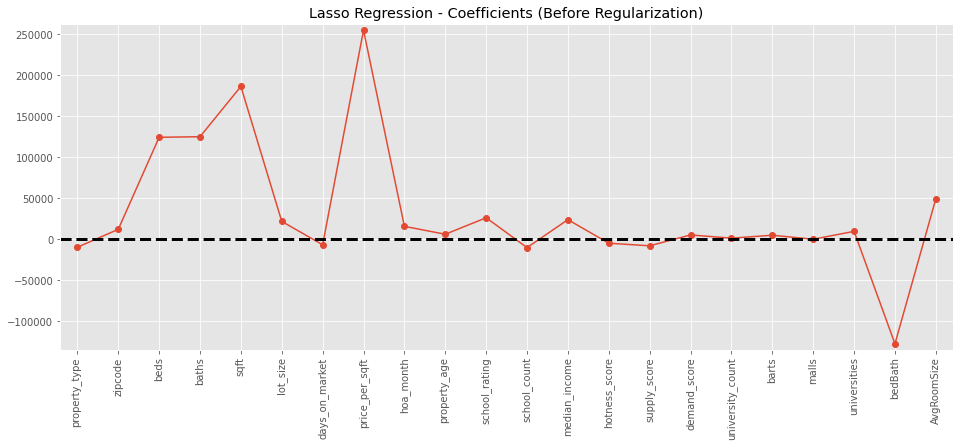

In [21]:
# Plot the coefficients
plt.subplots(figsize = (16,6))
plt.plot(range(len(X.columns)), lasso.coef_, marker='o')
plt.xticks(range(len(X.columns)), X.columns.values, rotation=90)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.title("Lasso Regression - Coefficients (Before Regularization)")
plt.margins(0.02)
plt.show()

Lasso Regression - Coefficients Summary:

 * As we can see above, Ridge Regression Coefficients are much smaller compared to Linear Regression!!
 * Again, 'university_count' and 'malls' are showing the least Coefficients (Least Important Features).
 * beds, baths, sqft, price_per_sqft and bedbath are the most important features.

### 7.3 Lasso Regression: Residuals Visualization<a id='7.3_Lasso_Regression:_Residuals_Visualization'></a>

C:\Users\aktha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

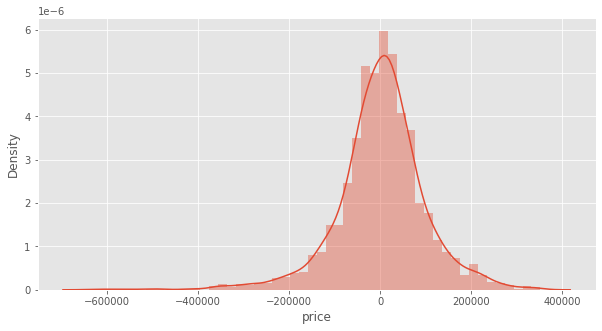

In [22]:
# visualizing residuals
fig = plt.figure(figsize=(10, 5))
residuals = (y_test-y_pred_lasso)
sns.distplot(residuals)

As we can see above by visualizing the residual we can see that is normally distributed which is a good indication that we're having a linear relationship with our dependent variable 'price'.

### 7.4 Lasso Regression Model Evaluation<a id='7.4_Lasso_Regression_Model_Evaluation'></a>

In [26]:
from sklearn import metrics

print("********Lasso Regression Model Evaluation********")
print("-------------------------------------------------")
print("Lasso Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_lasso) * 100), '%')
print("-------------------------------------------------")
print("Lasso Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_lasso)))
print("-------------------------------------------------")
print("Lasso Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_lasso)))
print("-------------------------------------------------")
print("Lasso Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))))
print("-------------------------------------------------")
print("Lasso Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_lasso) * 100), '%')
print("-------------------------------------------------")

********Lasso Regression Model Evaluation********
-------------------------------------------------
Lasso Regression - r2 Score: 93.4398 %
-------------------------------------------------
Lasso Regression - MAE: 69554.3493
-------------------------------------------------
Lasso Regression - MSE:9693079224.7295
-------------------------------------------------
Lasso Regression - RMSE:98453.4368
-------------------------------------------------
Lasso Regression - Variance Score:93.4418 %
-------------------------------------------------


As we can see, the value of **root mean squared error (RMSE) is 98,453.4368**, which is slightly larger than 10% of the mean value of the Sales Price i.e.  $887,769.19 also, we have very good **variance score at 93.4418%.**

This means that Base Lasso Regression is slightly better than Base Ridge algorithm **(RMSE 98,456.2616 & Variance Score 93.4414%)**.

### 7.5 Features Selection<a id='7.5_Features_Selection'></a>

As shown below let's try if we can improve predictions by dropping features with very low Coefficients:

In [28]:
print("***Lasso Regression - Coefficients***")
print("-------------------------------------")
print(pd.DataFrame(lasso.coef_.round(2), X.columns, columns=['coef']).sort_values(by='coef', ascending=False))
print("-------------------------------------")

***Lasso Regression - Coefficients***
-------------------------------------
                       coef
price_per_sqft    255030.03
sqft              186442.87
baths             125162.31
beds              124425.06
AvgRoomSize        49541.66
school_rating      26347.98
median_income      24026.11
lot_size           21927.10
hoa_month          15896.46
zipcode            12204.88
universities        9782.57
property_age        6247.42
demand_score        5411.39
barts               5073.95
university_count    1486.68
malls                158.95
hotness_score      -4666.30
days_on_market     -6588.85
supply_score       -7845.77
property_type      -9572.41
school_count      -10023.89
bedBath          -127254.44
-------------------------------------


**Dropping Features:**
 * First step let's drop 'malls', 'university_count' the lowest Coefficients.
 * We tried to drop more features but the Model performance degraded so best performance were achived by only dropping above features.

#### 7.5.1 Dropping 'malls' and 'university_count'<a id='7.5.1_Dropping_malls_university_count'></a>

In [29]:
# So Now, Let's re define/select our features and keep only high Coefficients:
# let's drop  'malls' and 'university_count':
features = ['property_type', 'zipcode', 'beds', 'baths', 'sqft', 'lot_size', 
            'days_on_market', 'price_per_sqft', 'hoa_month', 'property_age',
            'school_rating', 'school_count', 'median_income', 'hotness_score', 
            'supply_score', 'demand_score', 'barts', 'universities', 'bedBath', 
            'AvgRoomSize']

# And, Now let's define X and y:
X = df[features]
y = df.price

In [30]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

In [31]:
# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [32]:
# Create a ridge regressor: ridge
lasso_2 = Lasso(random_state=1981) # alpha=1 (Default)

# Fit the regressor to the training data
lasso_2.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient Tuned: {:.4f}".format(lasso_2.score(X_test, y_test) * 100), '%')

# Predict on the test data: y_pred_ridge
y_pred_lasso_2 = lasso_2.predict(X_test)


R-Squared coefficient Tuned: 93.4450 %


C:\Users\aktha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3122083731711.6875, tolerance: 84479631947.53459
  positive)


In [33]:
print("********Tuned Lasso Regression Model Evaluation********")
print("-------------------------------------------------------")
print("Tuned Lasso Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_lasso_2) * 100), '%')
print("-------------------------------------------------------")
print("Tuned Lasso Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_lasso_2)))
print("-------------------------------------------------------")
print("Tuned Lasso Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_lasso_2)))
print("-------------------------------------------------------")
print("Tuned Lasso Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso_2))))
print("-------------------------------------------------------")
print("Tuned Lasso Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_lasso_2) * 100), '%')
print("-------------------------------------------------------")

********Tuned Lasso Regression Model Evaluation********
-------------------------------------------------------
Tuned Lasso Regression - r2 Score: 93.4450 %
-------------------------------------------------------
Tuned Lasso Regression - MAE: 69516.0097
-------------------------------------------------------
Tuned Lasso Regression - MSE:9685389213.4795
-------------------------------------------------------
Tuned Lasso Regression - RMSE:98414.3750
-------------------------------------------------------
Tuned Lasso Regression - Variance Score:93.4470 %
-------------------------------------------------------


#### 7.5.2 Features Selection Summary<a id='7.5.2_Features_Selection_Summary'></a>

As we can see below, when we're dropping 2 features ('malls', 'university_count'): we're seeing the best Result for Lasso regression. 

|Features Selection| r2 Score|    MAE  | MSE  | RMSE|Variance Score|
|:----------------------|:-------:|:-------:|:----:|:----:|:----:|
|Baseline (all features)|93.4398 %|69554.3493|9693079224.7295|98453.4368|93.4418 %|
|Dropping 2 features    |93.4450 %|69516.0097|9685389213.4795|98414.3750|93.4470 %|


### 7.6 Regularization I: Lasso<a id='7.6_Regularization_I:_Lasso'></a>

In [34]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV

n_alphas = 300
alphas = np.logspace(-5, 4, n_alphas) #let's use linspace from NumPy to control the precise end value

params = {'alpha': alphas }             

# Create a ridge regressor: lasso
lasso = Lasso(random_state=1981)

#cross validation
folds = 5

# Setup the GridSearchCV object: ridge_cv
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds,  n_jobs=-1,
                        return_train_score=True,
                        verbose = 1)   

# Fit it to the training data
lasso_cv.fit(X_train, y_train) # We'll be using same training data where we dropped 2 features



Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=Lasso(random_state=1981), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-05, 1.07176689e-05, 1.14868426e-05, 1.23112175e-05,
       1.31947552e-05, 1.41417017e-05, 1.51566076e-05, 1.62443501e-05,
       1.74101565e-05, 1.86596292e-05, 1.99987727e-05, 2.14340223e-05,
       2.29722754e-05, 2.46209240e-05, 2.63878910e-05, 2.82816678e-05,
       3.03113550e-05, 3.248...
       2.67974609e+03, 2.87206312e+03, 3.07818214e+03, 3.29909369e+03,
       3.53585937e+03, 3.78961698e+03, 4.06158599e+03, 4.35307336e+03,
       4.66547988e+03, 5.00030684e+03, 5.35916329e+03, 5.74377375e+03,
       6.15598650e+03, 6.59778248e+03, 7.07128478e+03, 7.57876886e+03,
       8.12267350e+03, 8.70561248e+03, 9.33038717e+03, 1.00000000e+04])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [35]:
#checking the value of optimum number of parameters
print("Tuned Lasso Regression Parameters: {}".format(lasso_cv.best_params_))
print("Lasso Regression - Best neg_mean_absolute_error is {:.4f}".format(lasso_cv.best_score_ * 100), "%")

Tuned Lasso Regression Parameters: {'alpha': 507.79172432054037}
Lasso Regression - Best neg_mean_absolute_error is -7124150.5787 %


In [36]:
cv_results = pd.DataFrame(lasso_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.181600,0.006590,0.001001,0.000001,1e-05,{'alpha': 1e-05},-71373.080731,-68670.685943,-73529.653871,-71288.892305,...,-71381.327311,1575.503734,268,-71344.417259,-72029.185178,-70758.284581,-68507.527448,-71175.108638,-70762.904621,1199.856915
1,0.187197,0.004706,0.001202,0.000403,1.07177e-05,{'alpha': 1.0717668854455034e-05},-71373.080731,-68670.685942,-73529.653871,-71288.892305,...,-71381.327310,1575.503735,267,-71344.417259,-72029.185178,-70758.284581,-68507.527448,-71175.108638,-70762.904621,1199.856915
2,0.183999,0.009317,0.001003,0.000002,1.14868e-05,{'alpha': 1.1486842567375548e-05},-71373.080730,-68670.685942,-73529.653871,-71288.892305,...,-71381.327310,1575.503735,266,-71344.417258,-72029.185178,-70758.284581,-68507.527448,-71175.108637,-70762.904621,1199.856915
3,0.195398,0.004676,0.001002,0.000001,1.23112e-05,{'alpha': 1.2311217482038896e-05},-71373.080729,-68670.685942,-73529.653871,-71288.892304,...,-71381.327310,1575.503735,265,-71344.417258,-72029.185178,-70758.284581,-68507.527447,-71175.108637,-70762.904620,1199.856915
4,0.186398,0.008846,0.001203,0.000402,1.31948e-05,{'alpha': 1.3194755216767059e-05},-71373.080729,-68670.685941,-73529.653872,-71288.892304,...,-71381.327309,1575.503735,264,-71344.417258,-72029.185177,-70758.284581,-68507.527447,-71175.108637,-70762.904620,1199.856916


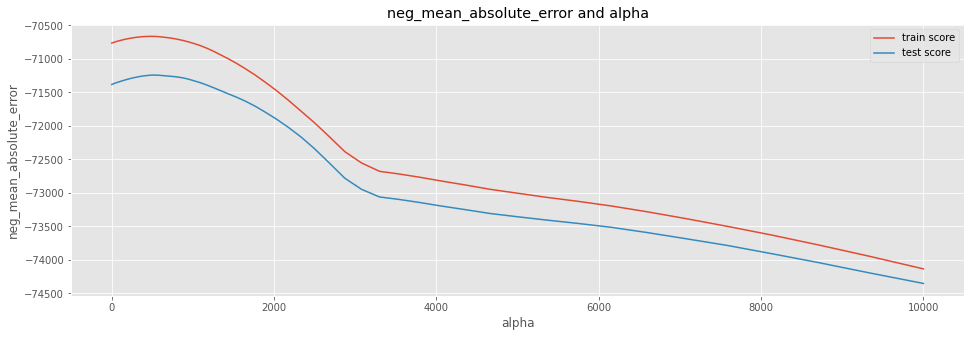

In [37]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting r2 score vs alpha:
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
#plt.axvline(0.001, color='black', ls='--', lw=2, label='Alpha=0.0001')
plt.xlabel('alpha')
plt.ylabel('neg_mean_absolute_error')
plt.title("neg_mean_absolute_error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

#### 7.6.1 Fitting Lasso Regression<a id='7.6.1_Fitting_Lasso_Regression'></a>

In [38]:
# Create a ridge regressor: lasso_a
alpha = 507.79172432054037 # using best Alpha after GridSearchCV
lasso_a = Lasso(alpha=alpha, random_state=1981)

# Fit the regressor to the training data
lasso_a.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient Tuned_Alpha : {:.4f}".format(lasso_a.score(X_test, y_test) * 100), '%')


R-Squared coefficient Tuned_Alpha : 93.4139 %


 R-Squared coefficient is lower in Lasso Rgerssion (93.4139%) compared to Tuned Ridge Regression (93.4576%)

In [39]:
# Predict on the test data: y_pred_ridge
y_pred_lasso_a = lasso_a.predict(X_test)

#### 7.6.2 Lasso Regression: Coefficients (After Regularization) <a id='7.6.2_Lasso_Regression:_Coefficients_(After_Regularization)'></a>

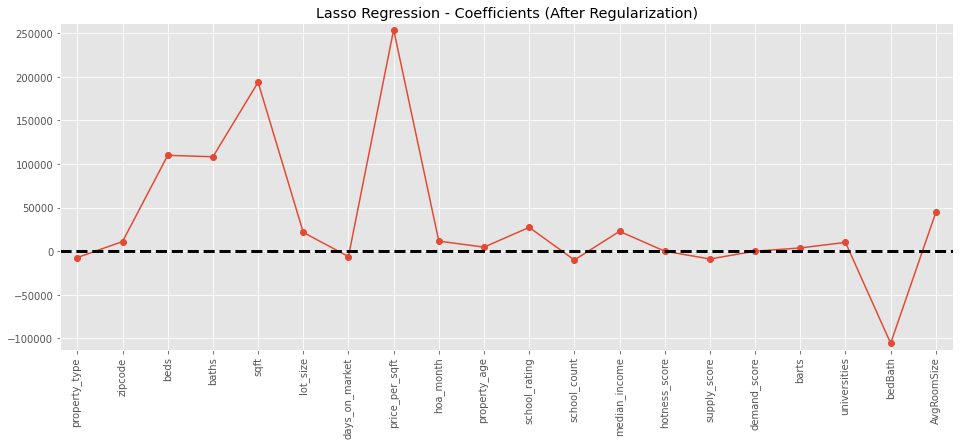

In [41]:
# Plot the coefficients
plt.subplots(figsize = (16,6))
plt.plot(range(len(X.columns)), lasso_a.coef_, marker='o')
plt.xticks(range(len(X.columns)), X.columns.values, rotation=90)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.title("Lasso Regression - Coefficients (After Regularization)")
plt.margins(0.02)
plt.show()

Alright, As we can see above, No Changes in Lasso Regression before or after Regularization (oppositie of what we saw in Ridge Regression).

#### 7.6.3 Lasso Regression Model Evaluation<a id='7.6.3_Lasso_Regression_Model_Evaluation'></a>

In [42]:
print("********Tuned_Alpha Lasso Regression Model Evaluation********")
print("-------------------------------------------------------------")
print("Tuned_Alpha Lasso Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_lasso_a) * 100), '%')
print("-------------------------------------------------------------")
print("Tuned_Alpha Lasso Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_lasso_a)))
print("-------------------------------------------------------------")
print("Tuned_Alpha Lasso Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_lasso_a)))
print("-------------------------------------------------------------")
print("Tuned_Alpha Lasso Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso_a))))
print("-------------------------------------------------------------")
print("Tuned_Alpha Lasso Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_lasso_a) * 100), '%')
print("-------------------------------------------------------------")

********Tuned_Alpha Lasso Regression Model Evaluation********
-------------------------------------------------------------
Tuned_Alpha Lasso Regression - r2 Score: 93.4139 %
-------------------------------------------------------------
Tuned_Alpha Lasso Regression - MAE: 69301.0785
-------------------------------------------------------------
Tuned_Alpha Lasso Regression - MSE:9731339265.5141
-------------------------------------------------------------
Tuned_Alpha Lasso Regression - RMSE:98647.5507
-------------------------------------------------------------
Tuned_Alpha Lasso Regression - Variance Score:93.4158 %
-------------------------------------------------------------


As we can see, the value of **root mean squared error (RMSE) is 98,647.5507**, which is slightly larger than 10% of the mean value of the Sales Price i.e.  $887,769.19. also, we have **very good variance score at 93.4158%.** 

This means that **Tuned Ridge algorithm ((RMSE): 98,319.9485 & Variance Score:93.4594 %**, is better than our Tuned Lasso Model.

## 8. Lasso Regression Tuning Summary<a id='8_Lasso_Regression_Tuning_Summary'></a>

As we can see below, We managed to improve our Lasso Regression Model by:
 * Dropping 2 features ('malls', 'university_count'), and
 * Variance Score has improved from 93.4418 % (Lasso - baseline) to 93.4470 %
 
However, Lasso Model degraded after we applied regularization L1 as shown below: 


|Model Tuning| r2 Score|    MAE  | MSE  | RMSE|Variance Score|
|:----------------------|:-------:|:-------:|:----:|:----:|:----:|
|Baseline  (all features + Alpha=1 (Default))|93.4398 %|69554.3493|9693079224.7295|98453.4368|93.4418 %|
|Dropping 2 features    |93.4450 %|69516.0097|9685389213.4795|98414.3750|93.4470 %|
|Dropping 2 features + Regularization I (Alpha =507.79172432054037)  |93.4139  %|69301.0785|9731339265.5141|98647.5507|93.4158 %|

## 9. Lasso Regression Actual vs Prediction Visualization<a id='9_Lasso_Regression_Actual_vs_Prediction_Visualization'></a>

Text(0, 0.5, 'Prediction')

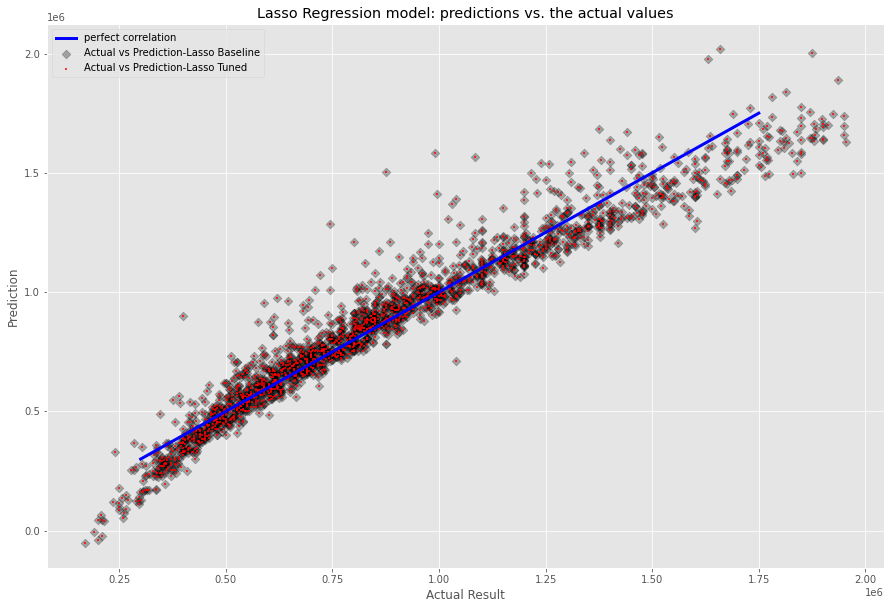

In [43]:
# Let's plot the predictions against the actual result. Use scatter()
plt.figure(figsize=(15,10))

# Since Regularization didn't improve we'll use model after we dropped the less important features:y_pred_lasso_2
plt.scatter(y_test,y_pred_lasso_2, color='black', marker='D', s=40, alpha=0.3, label='Actual vs Prediction-Lasso Baseline')
plt.scatter(y_test,y_pred_lasso_2, color='red', marker='+', s=5, alpha=0.75,label='Actual vs Prediction-Lasso Tuned')
plt.title('Lasso Regression model: predictions vs. the actual values')

# Add a line for perfect correlation
plt.plot([300000,1750000],[300000,1750000],color = 'blue', linewidth=3, label='perfect correlation')
plt.legend()
plt.xlabel('Actual Result')
plt.ylabel('Prediction')

In [45]:
final_lasso = pd.DataFrame({'SalePrice_Actual': y_test, 'SalePrice_Predicted': y_pred_lasso_2.round(3)})
final_lasso.head(10).sort_values(by='SalePrice_Actual', ascending=False)

,SalePrice_Actual,SalePrice_Predicted
696,1770000,1694158.514
4489,850000,907705.981
7400,825000,867088.486
3136,821000,752286.493
5011,820000,891265.724
535,750000,1099090.240
4969,705000,883116.133
4768,525000,534313.629
4032,525000,563082.673
5130,505000,565306.837


## 10. Models next step:<a id='10_Models_next_step'></a>

Now, after building our 2nd Model: Ridge Regression, let's see if we can further improve our prediction using below algorithm:

 * Logistic Regression.
 

## 9. Saving our Data<a id='9_Saving_our_data'></a>
Finally, let's save our final DataFrame with the new features:


In [ ]:
# Saving df_final_v1:
df_final_v1.to_csv(path_or_buf = "path" + "/pre_processing_df.csv", index=False)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))